In [46]:
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt 
%matplotlib inline

## 서울시 CCTV 현황

In [2]:
cs=pd.read_csv('csv,xlsx/01. CCTV_in_Seoul.csv',encoding='utf-8')
cs.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [4]:
# columns 이름바꾸기
cs.rename(columns={cs.columns[0]:'구별'},inplace=True)
cs.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 서울시 인구 현황

In [5]:
# 서울의 인구는 어떻게 구성되어 있는가?
ps=pd.read_excel('csv,xlsx/population_in_Seoul.xls',header=2,usecols='B,D,G,J,N')
ps.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [6]:
ps.rename(columns={ps.columns[0]:'구별',
                   ps.columns[1]:'인구수',
                   ps.columns[2]:'한국인',
                   ps.columns[3]:'외국인',
                   ps.columns[4]:'고령자'},inplace=True)
ps.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## cctv 데이터 파악하기
- 서울 시내 구별 cctv는 몇대가 각삭 설치되었는가?
- 서울시의 cctv 설치 편향성이 존재하는지?

In [7]:
# 소계 개수대로 뽑기
cs1=cs.sort_values(by='소계',ascending=False)
cs1

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


- 최근 cctv 증가율은 어떻게 변했는지?

In [8]:
cs['최근증가율']=(cs['2016년']+cs['2015년']+cs['2014년'])/cs['2013년도 이전'] *100
cs2=cs.sort_values(by='최근증가율',ascending=False)
cs2

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


## 서울 인구데이터 파악하기
- 서울시에 거주하는 인구의 형태는?
- 서울시에는 내국인은 지역구별 분포는 어떻게 되어 있는지?
- 서울시지역구별 외국인분포는 어떻게 되어있는가?

In [9]:
ps

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [10]:
ps['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [11]:
# 결측치 확인하기
ps[ps['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [12]:
# 결측치 드랍
ps.drop([26],inplace=True)
ps

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


- 서울시의 외국인의 비율은 어느정도인지?
- 서울의 고령자 비율은 어느정도인지?

- 어느구에 외국인이 많이살고 적은지 알수있는지
- 어느구에 고령자가 많은지 적은지

In [13]:
ps['외국인비율']=ps['외국인']/ ps['인구수'] * 100
ps['고령자비율']=ps['고령자']/ ps['인구수'] * 100
ps.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [14]:
ps.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [15]:
ps.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## cctv 데이터와 인구 데이터 합치고 분석하기
- merge 통해서 '구별'을 통해 mearge 

In [53]:
# 구별을 중심으로 두 데이터를 통합
cp=pd.merge(cs,ps,on='구별')
cp.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [54]:
# del 짱이다 ㅋㅋㅋ
del cp['2013년도 이전']
del cp['2014년']
del cp['2015년']
del cp['2016년']
cp

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [55]:
cp.rename(columns={cp.columns[1]:'cctv개수'},inplace=True)
cp.head()

,구별,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [22]:
cp.set_index('구별',inplace=True)
cp.head()

,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### numpy의 correcdoef(상관계수)를 사용하여 상관관계를 분석

##### 고령자비율 ,외국인비율, 인구수중 무슨 데이터와 cctv를 비교 분석할지

- 상관관계 분석 기준   
1) 값이 0.1이면 거의 무시  
2) 값이 0.3이하면 약한 상관관계 ★★★  
3) 0.7이하면 뚜렷한 상관관계 ★★★★  

In [23]:
np.corrcoef(cp['고령자비율'],cp['cctv개수'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [24]:
np.corrcoef(cp['외국인비율'],cp['cctv개수'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [25]:
np.corrcoef(cp['인구수'],cp['cctv개수'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

- 상관관계 분석결과 CCTV 개수와 고령자비율은 상관관계가 존재하지 않음
- 외국인비율과 CCTV 개수는 큰 의미가 없는 것으로 분석됨
- 인구수와 상관관계가 0.3으로 나타나 약한상관관계가 있는 것으로 분석됨
    - cctv와 인구수의 관계를 추가적 분석이 필요함
    

In [26]:
cp.sort_values(by='cctv개수',ascending=False).head(3)

,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


In [27]:
cp.sort_values(by='인구수',ascending=False).head(3)

,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217


In [28]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

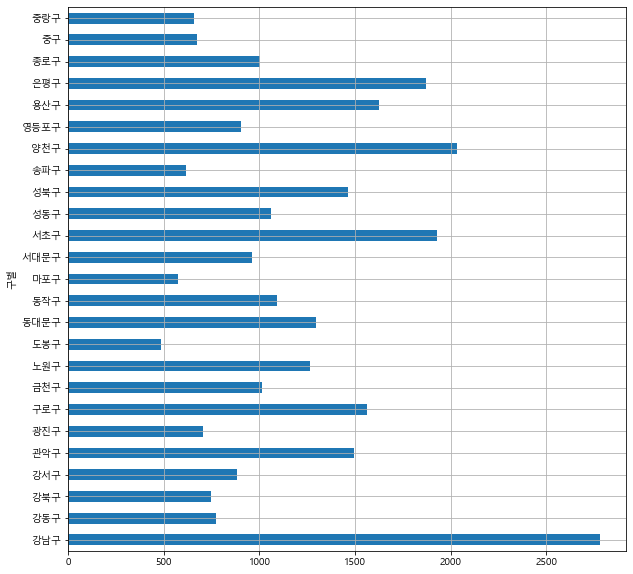

In [31]:
plt.figure()

# barth plot(수평바)으로 생성해서 그려보기
# grid = True로 Grid 효과 넣기
cp['cctv개수'].plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

<AxesSubplot:ylabel='구별'>

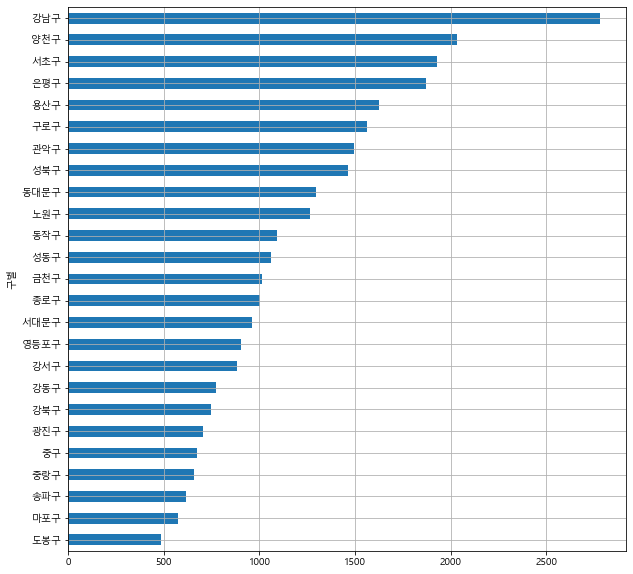

In [32]:
cp['cctv개수'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

- CCTV개수는 서울시의 타 지역구보다 강남구가 월등히 많이 설치 되어 있음
- 상대적으로 양천구, 섳초구, 은평구도 많은 CCTV가 설치되어 있음
- 인구대비 CCTV 비율을 추가 분석이 필요

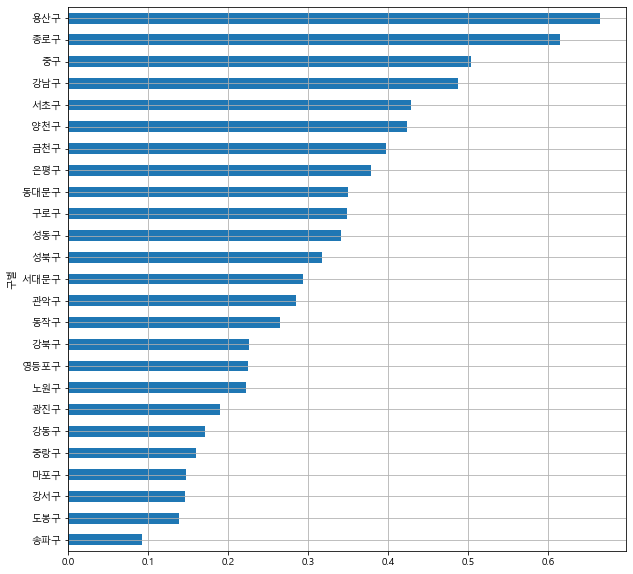

In [34]:
cp['CCTV비율']=cp['cctv개수']/cp.인구수 *100
cp['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

In [35]:
cp

,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.189970
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.348536
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.222170


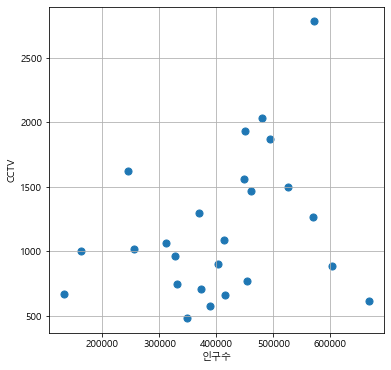

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(cp.인구수 , cp.cctv개수, s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [39]:
fp1=np.polyfit(cp.인구수, cp.cctv개수,1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [40]:
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)

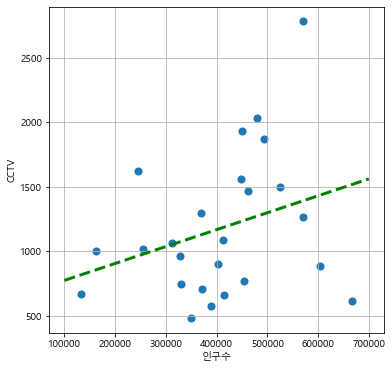

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(cp.인구수 , cp.cctv개수, s=50)
# 선의 종류 (line Style)과 선의 두께 (line width)는 참조하여 변경적용
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 좀더 설득력 있는 자료 만들기

In [43]:
fp1=np.polyfit(cp['인구수'], cp['cctv개수'],1)
f1= np.poly1d(fp1)
fx= np.linspace(100000, 700000, 100)

cp['오차']=np.abs(cp['cctv개수']-f1(cp['인구수']))
cp_sort = cp.sort_values(by='오차', ascending =False)
cp_sort.head()

,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


<function matplotlib.pyplot.show(close=None, block=None)>

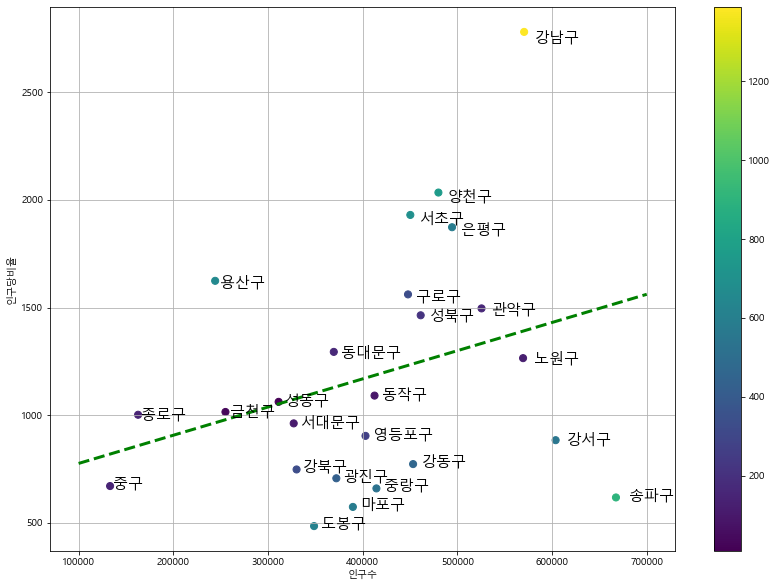

In [44]:
plt.figure(figsize=(14,10))
plt.scatter(cp['인구수'],cp['cctv개수'],
           c=cp['오차'],s=50)
plt.plot(fx,f1(fx), ls='dashed',lw=3,color='g')

for n in range(len(cp_sort)):
    plt.text(cp_sort['인구수'][n]*1.02,cp_sort['cctv개수'][n]*0.98,
            cp_sort.index[n],fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다

In [56]:
cp

,구별,cctv개수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


<AxesSubplot:xlabel='고령자', ylabel='cctv개수'>

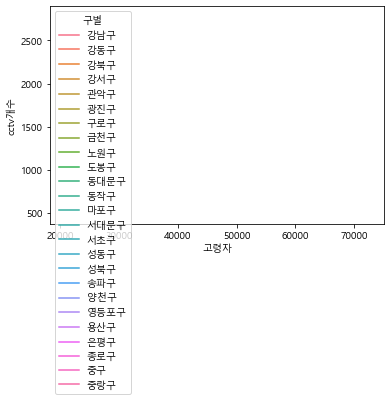

In [58]:
sns.lineplot(x=cp['고령자'],y=cp['cctv개수'],hue=cp['구별'],data=cp)
